Project plan

1. problem formulation :  
Context : we have been instructed to predict books ratings from provided data 
2 .Clean Data
3. EDA
4. features engineering 
5. modelling & Machine learning 
6. Model validation
7. deployment

In [1]:
!conda env list 

# conda environments:
#
                         /Users/mpaga/Library/r-miniconda
                         /Users/mpaga/Library/r-miniconda/envs/r-reticulate
                         /Users/mpaga/miniconda3
base                  *  /Users/mpaga/opt/anaconda3
Project1                 /Users/mpaga/opt/anaconda3/envs/Project1
bootcamp                 /Users/mpaga/opt/anaconda3/envs/bootcamp
pandas_cookBook          /Users/mpaga/opt/anaconda3/envs/pandas_cookBook
pandas_cookbook          /Users/mpaga/opt/anaconda3/envs/pandas_cookbook
tf                       /Users/mpaga/opt/anaconda3/envs/tf
                         /Users/mpaga/tf
                         /usr/local/bin



In [2]:
# install libraries 
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
#!pip install plotly 
#!pip install -U scikit-learn
#!pip install datetime 

In [3]:
# load libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly as ply
import sklearn as skl
import datetime as dt

In [4]:
# load data 
df = pd.read_csv("books.csv")

== inspect data ==

In [5]:
df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [6]:
df.tail(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [7]:
df.shape

(11127, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [9]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [10]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
bookID,11127.0,2.131094e+04,1.309336e+04,1.000000e+00,1.028700e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11127.0,3.933631e+00,3.524450e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.135000e+00,5.000000e+00
isbn13,11127.0,9.759888e+12,4.428964e+11,8.987060e+09,9.780345e+12,9.780586e+12,9.780873e+12,9.790008e+12
num_pages,11127.0,3.363769e+02,2.411273e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11127.0,1.793641e+04,1.124794e+05,0.000000e+00,1.040000e+02,7.450000e+02,4.993500e+03,4.597666e+06
text_reviews_count,11127.0,5.418545e+02,2.576177e+03,0.000000e+00,9.000000e+00,4.600000e+01,2.375000e+02,9.426500e+04


In [11]:
df.describe(include="object").T

,count,unique,top,freq
title,11127,10352,The Brothers Karamazov,9
authors,11127,6643,Stephen King,40
isbn,11127,11127,0439785960,1
language_code,11127,27,eng,8911
publication_date,11127,3679,10/1/2005,56
publisher,11127,2292,Vintage,318


In [12]:
len(df.bookID)== df.shape[0]

True

There is no duplicate ID in data 

== clean data == 

In [13]:
# A revoir !!!
# change from string to datetime object 
# for loop to parse date 
df["publication_Date"]= pd.Series(dtype="int")
cnt = 0
for i in range(len(df.publication_date)) :
    month,day,year = map(int,df.publication_date[i].split('/'))

    if month in [4,6,9,11] and day > 30:
        day = 30
        df["publication_Date"][i] = dt.date(year,month,day)
    elif(month==2 and day > 28 and year % 4 != 0):
        day = 28
    df["publication_Date"][i] = dt.date(year,month,day)
    cnt +=1
if (cnt == len(df.publication_date)) :
    print("no date issue" )
 

/var/folders/dr/qtbb25gd2pl7ssnx51bqxv6r0000gp/T/ipykernel_904/1962423740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_Date"][i] = dt.date(year,month,day)


no date issue


In [14]:
df=df.drop("publication_date",axis=1)
df.publication_Date.describe()

count          11127
unique          3678
top       2005-10-01
freq              56
Name: publication_Date, dtype: object

In [15]:
# remove heading whitespace from num_pages features 
df = df.rename(columns = {"  num_pages" : "num_pages"})
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publisher', 'publication_Date'],
      dtype='object')

In [16]:
df.isna().sum().sum()

0

There is no NA in df

In [17]:
# na check in average_rating
if (df.average_rating.isna().mean() == 0 ) :
    print("There is no NA in average_rating")
else:
    print("There are NA in average_rating")

There is no NA in average_rating


In [18]:
# numerical summary average_rating 
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

<AxesSubplot: >

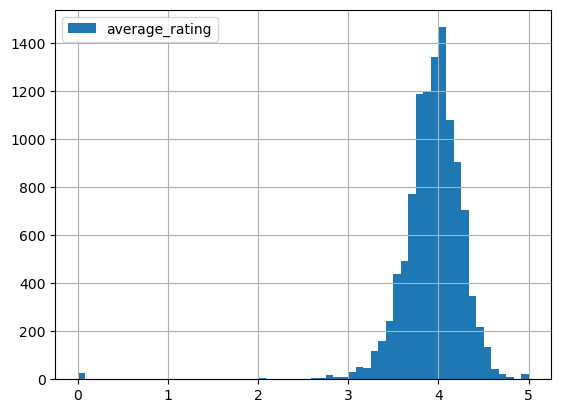

In [19]:
# histogram of average ratings 
df.average_rating.hist(bins=60,legend={""})

In [20]:
#numerical summary num_pages
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

<AxesSubplot: >

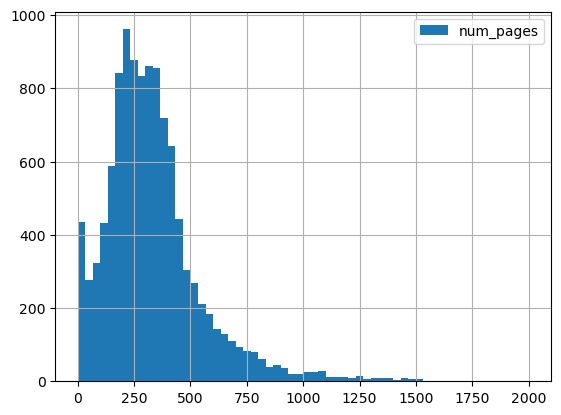

In [21]:
# histogram of num_pages 
df.num_pages.hist(bins = 60,range=[0,2000],legend={""})

In [22]:
# numerical summary authors 
df.authors.describe()

count            11127
unique            6643
top       Stephen King
freq                40
Name: authors, dtype: object

In [23]:
# sort authors
(df
 .groupby("authors")
 .aggregate("mean")
 .sort_values(by=["average_rating","text_reviews_count"],ascending=False)
 [["average_rating","text_reviews_count"]]
 .head(5)
)

/var/folders/dr/qtbb25gd2pl7ssnx51bqxv6r0000gp/T/ipykernel_904/2785170087.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .aggregate("mean")


,average_rating,text_reviews_count
authors,,
John Diamond,5.0,3.0
Chris Green/Chris Wright/Paul Douglas Gardner,5.0,1.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric Weiner,5.0,1.0
Todd Davis/Marc Frey,5.0,1.0
William C. Dowling,5.0,1.0


In [24]:
# numerical summary text_reviews_count 
df.text_reviews_count.describe()

count    11127.000000
mean       541.854498
std       2576.176608
min          0.000000
25%          9.000000
50%         46.000000
75%        237.500000
max      94265.000000
Name: text_reviews_count, dtype: float64

<AxesSubplot: >

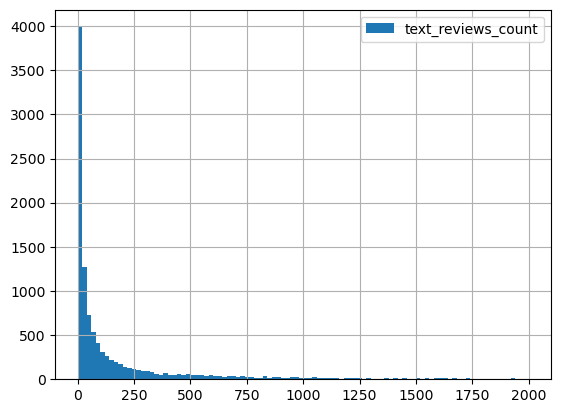

In [25]:
#histogram of text_reviews_count
df.text_reviews_count.hist(bins = 100,range =[0,2000],legend={""})


In [26]:
# nulerical summary ratings_count 
df.ratings_count.describe()

count    1.112700e+04
mean     1.793641e+04
std      1.124794e+05
min      0.000000e+00
25%      1.040000e+02
50%      7.450000e+02
75%      4.993500e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

<AxesSubplot: >

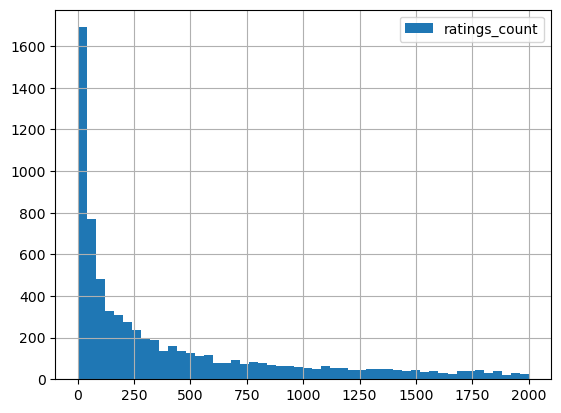

In [27]:
# histogram of ratings_count 
df.ratings_count.hist(bins = 50,range = [0,2000],legend ={""})

== 2D plot == 

<AxesSubplot: xlabel='num_pages', ylabel='average_rating'>

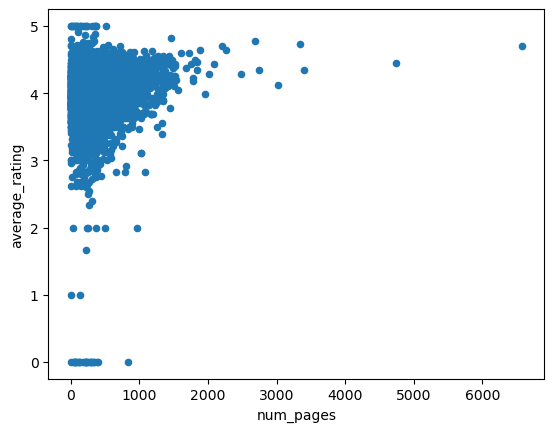

In [28]:
# scatter plot average rating vs num_pages
df.plot.scatter(x="num_pages",y = "average_rating")

<AxesSubplot: xlabel='text_reviews_count', ylabel='average_rating'>

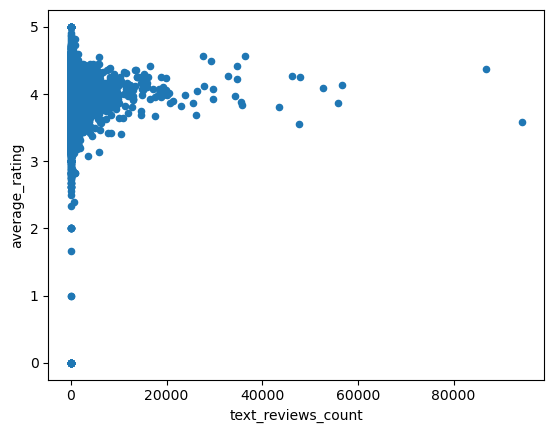

In [29]:
# scatter plot average_rating vs text_reviews_count 
df.plot.scatter(x="text_reviews_count",y = "average_rating")

<AxesSubplot: xlabel='ratings_count', ylabel='average_rating'>

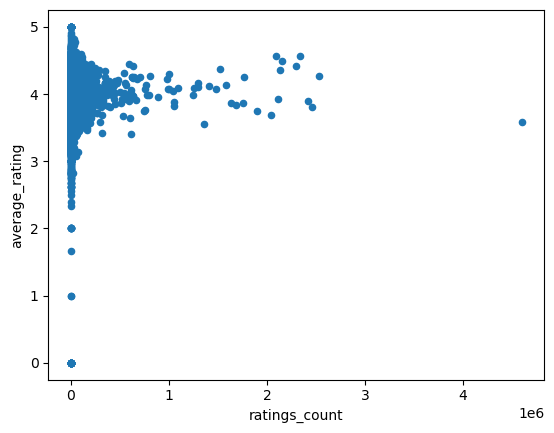

In [30]:
# scatter plot average rating. vs ratings count 
df.plot.scatter(x="ratings_count",y = "average_rating")

== correlation == 

In [31]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publisher', 'publication_Date'],
      dtype='object')

In [32]:
# correlation table
df[['num_pages','average_rating','text_reviews_count']].corr()


,num_pages,average_rating,text_reviews_count
num_pages,1.000000,0.150809,0.036998
average_rating,0.150809,1.000000,0.033734
text_reviews_count,0.036998,0.033734,1.000000


numerical features are not correlated 

=== features engineering ==  
we are going to remove variables without any variations :
bookID, title , authors,isbn,isbn13, language_code, publisher

In [33]:
# create a new dataframe
df1 = df.drop(['bookID','title','authors','isbn','isbn13',
               'language_code','publisher'],axis = 1)

<AxesSubplot: >

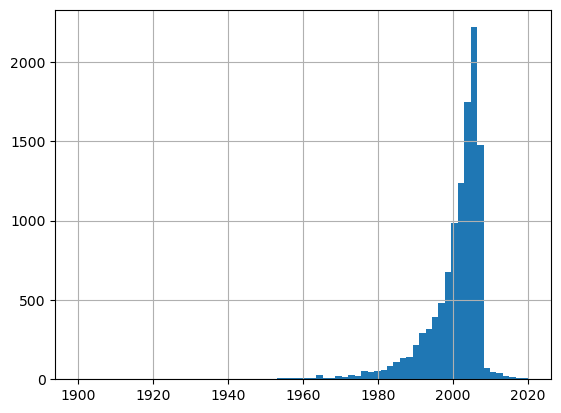

In [34]:
# histogram of publication date 
df1.publication_Date.hist(bins = 70)


In [35]:
df1.shape

(11127, 5)

In [36]:
df1["av_cat"] = pd.cut(df.average_rating,bins=[0,3,4,5],
                    labels = ["low","medium","high"], include_lowest=True)

In [37]:
df1.av_cat.head(3)

0    high
1    high
2    high
Name: av_cat, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [38]:
df1.av_cat.tail(3)

11124    medium
11125    medium
11126    medium
Name: av_cat, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [39]:
round(df1.av_cat.value_counts()/ len(df1.av_cat),3)

medium    0.565
high      0.426
low       0.009
Name: av_cat, dtype: float64

<AxesSubplot: >

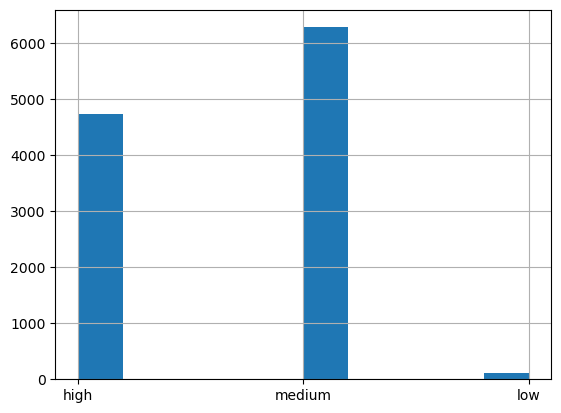

In [40]:
df1.av_cat.hist()

Discretizing average_rating  make it unbalanced data.   May be we need to consider it a regression problem instead.

== Splitting data == 

In [50]:
df1 = df[['average_rating','num_pages', 'ratings_count', 'text_reviews_count']]

In [51]:
from sklearn.model_selection import train_test_split
train0,test = train_test_split(df1, test_size= 20,random_state=42)

In [52]:
# split train0 in train and valid 
train,valid = train_test_split(train0,test_size=40,random_state=42)

In [53]:
df1.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'], dtype='object')

In [59]:
# subsetting 
# train0
X_train0 = train0.drop("average_rating",axis = 1)
y_train0 = train0.average_rating

# train
X_train = train.drop("average_rating",axis = 1)
y_train = train.average_rating

# valid 
X_valid = valid.drop("average_rating",axis=1)
y_valid = valid.average_rating

# test 
X_test = test.drop("average_rating",axis = 1)
y_test = test.average_rating

== modelling ==

In [60]:
# linear model 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [56]:

# regression coefficients 
reg.coef_

array([ 2.19042388e-04,  1.07767098e-07, -2.07788059e-07])

In [83]:
# lin reg perf : mae
pred = reg.predict(X_valid)
mae = skl.metrics.mean_absolute_error(y_valid,pred)

# lin reg perf : rmse
pred = reg.predict(X_valid)
rmse = skl.metrics.mean_squared_error(y_valid,pred)


In [99]:
# error table 
pd.DataFrame(data = [[mae , rmse]],columns = ["mae","rmse"]) 

,mae,rmse
0,0.243257,0.115217


In [105]:
# regularized model : ridge model
reg_ridge = linear_model.Ridge(alpha=0.01)
reg_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [108]:
# ridge_model evaluation
# lin reg perf : mae
pred= []
pred = reg_ridge.predict(X_valid)
mae = skl.metrics.mean_absolute_error(y_valid,pred)

# lin reg perf : rmse
pred = reg_ridge.predict(X_valid)
rmse = skl.metrics.mean_squared_error(y_valid,pred)

In [109]:
# error table 
pd.DataFrame(data = [[mae , rmse]],columns = ["mae","rmse"]) 

,mae,rmse
0,0.243257,0.115217
